In [1]:
import numpy as np
import diffraction as diff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time as time
import scipy.io

In [85]:
# use thetax and thetay to adjust initial orientation of the sample
thetax=np.pi/2*0
thetay=np.pi/2*0
hkl_dimension=5

# sigma_theta, if you need a small number for single crystal, input~0.01, if you need infinity, input~1000
sigma1=0.03

# sigma_phi
sigma2=1000

# sigma_r, use this to tune the peak linewidth
sigma3=0.03

# settings for imagine plane
resolutionx=200
qxymax=5
qzmax=5

resolutionz=int(resolutionx/qxymax*qzmax)
gridx,gridz=np.meshgrid(np.linspace(-qxymax,qxymax,resolutionx),np.linspace(0,qzmax,resolutionz))

In [86]:
# read crystal structure(POSCAR file which can be converted easily from cif on VESTA)
dirr = 'D:\\research\diff2D_simulation\input'
filename = '\S-NPB'
address = dirr + filename +'.vasp'
a1,a2,a3,positions=diff.read_poscar(address) # example (graphite)
Bpeaks = diff.Bragg_peaks(a1,a2,a3,positions,thetax,thetay,hkl_dimension)
# Bpeaks = diff.diffuse(a1,a2,a3,positions,thetax,thetay,hkl_dimension,0)
# Bpeaks.shape

In [87]:
t1_start = time.process_time()
# calculated GIWAXS pattern
III=diff.intensity(gridx,gridz,Bpeaks,sigma1,sigma2,sigma3,hkl_dimension)
t1_stop = time.process_time()
print('cpu time =')
print(t1_stop-t1_start,'s')

cpu time =
4.75 s


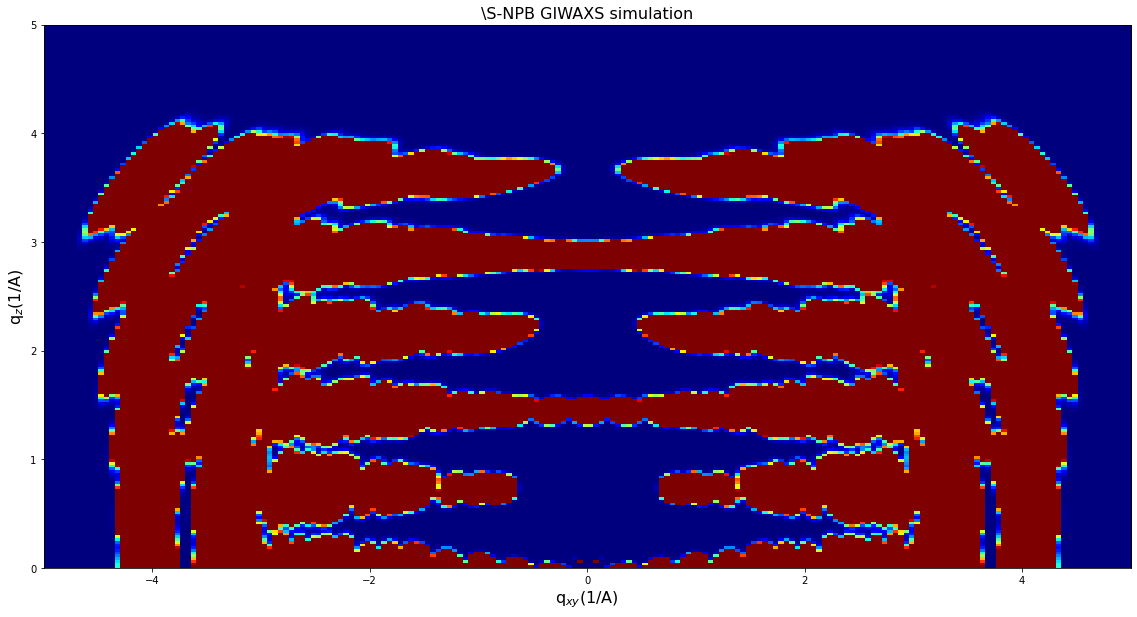

In [94]:
 # make the plot
colorbar=0.00001   # upper limit
    
II1=np.log(III+1)

II1=III
fig,ax=plt.subplots(figsize=(7,7))

ax.imshow(II1, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[-qxymax, qxymax, 0, qzmax],
               vmax=colorbar*II1.max(), vmin=II1.min())
ax.set_xlabel('q$_{xy}$(1/A)',fontsize=16)
ax.set_ylabel('q$_{z}$(1/A)',fontsize=16)
ax.set_title(filename+' GIWAXS simulation',fontsize=16)
fig.set_size_inches([20,10])
# plt.savefig(dirr + filename +'_1' +'.pdf')
# scipy.io.savemat(dirr+filename+'.mat', {'a': III})

Text(0.5, 1.0, 'I vs q')

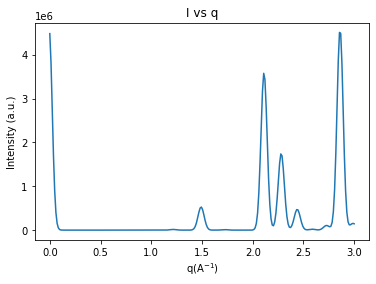

In [54]:
# integrate
temp=III[250,250:500]
plt.plot(np.linspace(0,qxymax,250),temp)
# plt.plot(np.linspace(0,qxymax,250),temp2)
# plt.plot(0.875*np.ones(100),np.linspace(0,III.max(),100))
# plt.plot(0.9*np.ones(100),np.linspace(0,III.max(),100))
plt.xlabel('q(A$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.title("I vs q")

In [66]:
2*np.pi/19

0.3306939635357677

In [76]:
np.sqrt(pow(2*np.pi/8,2)+pow(2*np.pi/8.7,2))

1.0669726506000803